## Student Adaptability Levels in Online Education
#### Dylan Picart

### Objective
Using a dataset that contains insightful student demographics, build a machine learning model that predicts which how well they'd adapt to online education.

### Sourcing Data
I will be using a Kaggle Dataset to predict adaptability. The features in the dataset are critical components in determining the scores of students.

Source: https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

##### Useful Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDRegressor

#### Load Data

In [8]:
# Load the data from its source format into a pandas dataframe
saoe_data = pd.read_csv('students_adaptability_level_online_education.csv')
df = saoe_data.copy()
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [40]:
print(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB
(1205, 14) None


In [7]:
df['Adaptivity Level'].value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

### Data Cleaning

Next steps would involve creating a class to contain all of our functions we would use for data cleaning so we could pass different datasets and efficiently clean them.

In [62]:
# Show column(s) you're currently inspecting
# Let's check for null values
nulls = (
         f'Null Values in Each Feature\n'
         f'---------------------------\n'
         f'Total Null Values:     {sum(df.isnull().sum())}\n'
         f'{df.isnull().sum()}'
)
print(nulls)

Null Values in Each Feature
---------------------------
Total Null Values:     0
Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64


### Exploratory Data Analysis

In [12]:
# Font dictionaries for formatting
font1 = {'family':'serif','color':'black','size':14}
font2 = {'family':'serif','color':'black','size':12}

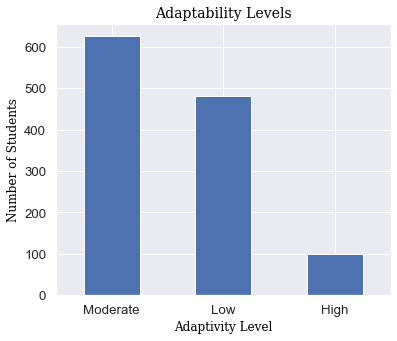

In [37]:
sns.set(font_scale=1.2)
df['Adaptivity Level'].value_counts().plot(kind='bar', figsize=(6, 5), rot=0)
plt.title("Adaptability Levels", fontdict=font1)
plt.xlabel("Adaptivity Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

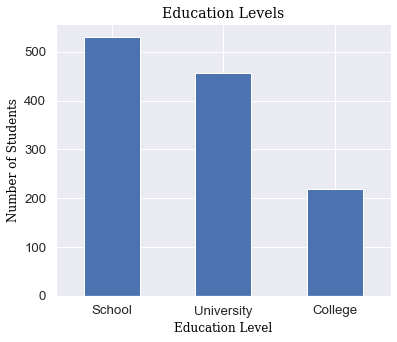

In [35]:
sns.set(font_scale=1.2)
df['Education Level'].value_counts().plot(kind='bar', figsize=(6, 5), rot=0)
plt.title("Education Levels", fontdict=font1)
plt.xlabel("Education Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

#### One Hot Encoding & Feature Engineering

Fortunately, there are no null values in this dataset, so we can easily proceed. However, these features are not numerical and will not provide meaningful insight for our predictive model unless we one hot encode them.

In [11]:
def ohenc(arr_to_convert):
    # Prepare & reshape column for OHE
    column_as_array = np.array(arr_to_convert).reshape(-1, 1)
    # Initialize our encoder
    enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    # Fit the column
    enc.fit(column_as_array)
    # Note this is a nested array, so we have to unpack with [0]
    global ec
    ec = enc.categories_[0]
    # Transform column
    ohe_conv_array = enc.transform(column_as_array)
    # Set global variable so we can access created DataFrame outside the function
    global df_ohe
    # Concatenate into a seperate DataFrame to build our model
    df_ohe = pd.DataFrame(data=ohe_conv_array, columns=ec)

In [45]:
print(f"{df['Age'].value_counts()}\n {df['Internet Type'].value_counts()}\n {df['Financial Condition'].value_counts()}")

21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: Age, dtype: int64
 Mobile Data    695
Wifi           510
Name: Internet Type, dtype: int64
 Mid     878
Poor    242
Rich     85
Name: Financial Condition, dtype: int64


Since there aren't many different values, we can one hot encode many of these series.

In [47]:
# One hot encode Age, Internet Type, Financial Condition
ohenc(df['Age'])
age = df_ohe

ohenc(df['Gender'])
gen = df_ohe

ohenc(df['Internet Type'])
inttyp = df_ohe

ohenc(df['Financial Condition'])
fc = df_ohe

ohenc(df['Education Level'])
ed = df_ohe

ohenc(df['Network Type'])
net = df_ohe

ohenc(df['Device'])
dev = df_ohe

In [57]:
# Concatenate our series together

conc_df = pd.concat([age, gen, inttyp, fc, ed, net, dev], axis=1)

conc_df['AdapLevel'] = df['Adaptivity Level']

conc_df

,1-5,11-15,16-20,21-25,26-30,6-10,Boy,Girl,Mobile Data,Wifi,...,College,School,University,2G,3G,4G,Computer,Mobile,Tab,AdapLevel
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Moderate
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Moderate
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Moderate
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Moderate
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Low
1201,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Moderate
1202,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Moderate
1203,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Low


In [58]:
# Check nulls
sum(conc_df.isnull().sum())

0

In [59]:
conc_df.corr().AdapLevel

AttributeError: 'DataFrame' object has no attribute 'AdapLevel'

<AxesSubplot:>

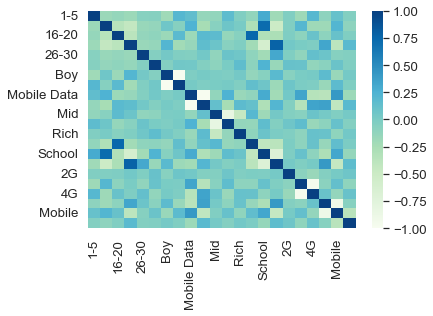

In [52]:
sns.heatmap(conc_df.corr(), cmap='GnBu')
